In [58]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap


from simulator import simulator
from ads import ADS

# Varying parameters - Rock

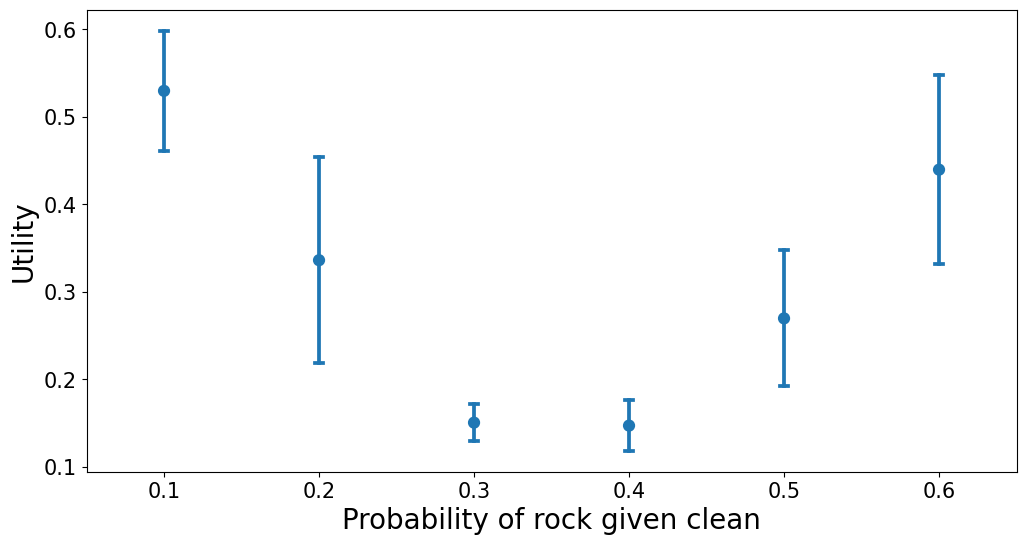

In [59]:
df = pd.read_csv("results/sim3_prop_puddle_1000_dipa.csv")
path = "figs/sim3/"
#df = df[df.pr_rock.isin([0.1, 0.2, 0.3, 0.4])]

matplotlib.rc_file_defaults()
ax = sns.set_style(style=None, rc=None )

fig, ax = plt.subplots(figsize=(12,6))


#plot_ =  ax = sns.regplot(x="pr_rock", y="prop_manual", data=df)

plot_ = sns.pointplot(x="pr_puddle", y="prop_rejected_RtI", ci="sd", data=df, join=False, capsize=.05)
ax.set_xlabel('Probability of rock given clean', fontsize=20)
ax.set_ylabel('Utility', fontsize=20)
ax.tick_params(labelsize=15)



plt.show()

#plot_.figure.savefig("figs/env_state.png")

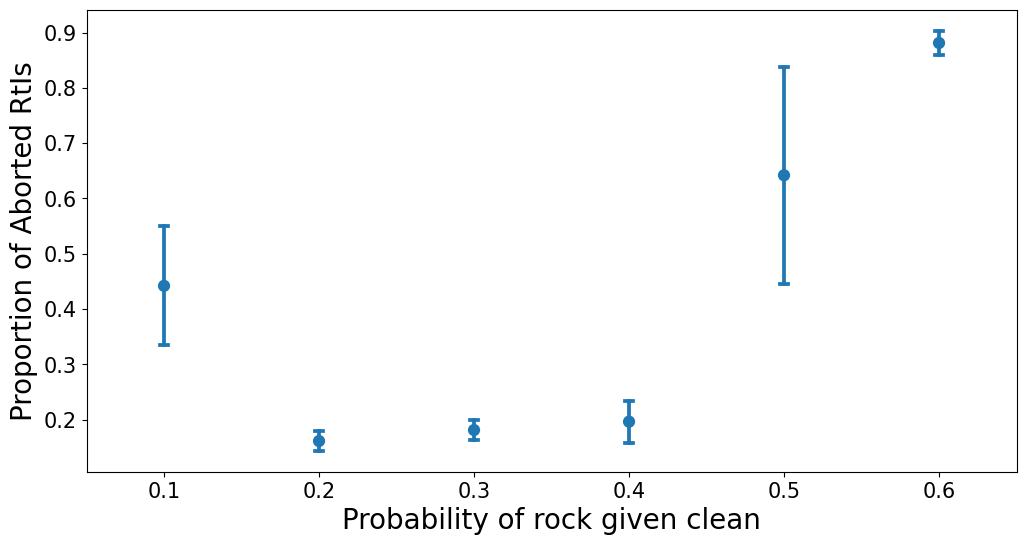

In [61]:
df = pd.read_csv("results/sim3_prop_rock_100.csv")
path = "figs/sim3/"
#df = df[df.pr_rock.isin([0.1, 0.2, 0.3, 0.4])]

matplotlib.rc_file_defaults()
ax = sns.set_style(style=None, rc=None )

fig, ax = plt.subplots(figsize=(12,6))


#plot_ =  ax = sns.regplot(x="pr_rock", y="prop_manual", data=df)

plot_ = sns.pointplot(x="pr_rock", y="prop_rejected_RtI", ci="sd", data=df, join=False, capsize=.05)
ax.set_xlabel('Probability of rock given clean', fontsize=20)
ax.set_ylabel('Proportion of Aborted RtIs', fontsize=20)
ax.tick_params(labelsize=15)



plt.show()

#plot_.figure.savefig("figs/env_state.png")

# Varying parameters - Puddle

In [7]:
df.groupby("pr_puddle").mean()

,avg_len_man,crashes,n_RtI,n_emergency,n_exp,prop_manual,prop_rejected_RtI,puddle_warnings,rock_warnings,skids,state_warnings,utility
pr_puddle,,,,,,,,,,,,
0.1,6.978679,1.94,41.80,1.20,49.5,0.190261,0.531306,116.52,18.62,4.70,187.22,0.140877
0.2,7.048936,3.63,111.15,7.56,49.5,0.404231,0.348878,357.91,18.70,14.25,109.72,-0.132492
0.3,6.756097,8.00,251.18,19.52,49.5,0.699317,0.149171,988.33,18.41,29.38,87.41,-0.734986
0.4,7.473242,6.93,236.54,10.11,49.5,0.718854,0.149858,993.74,19.20,35.30,56.56,-0.705567
0.5,8.404338,5.70,205.40,1.29,49.5,0.714784,0.268736,994.68,18.53,39.50,29.69,-0.641642
0.6,8.979695,4.70,172.01,0.07,49.5,0.686874,0.434191,994.75,21.28,39.11,12.81,-0.551858


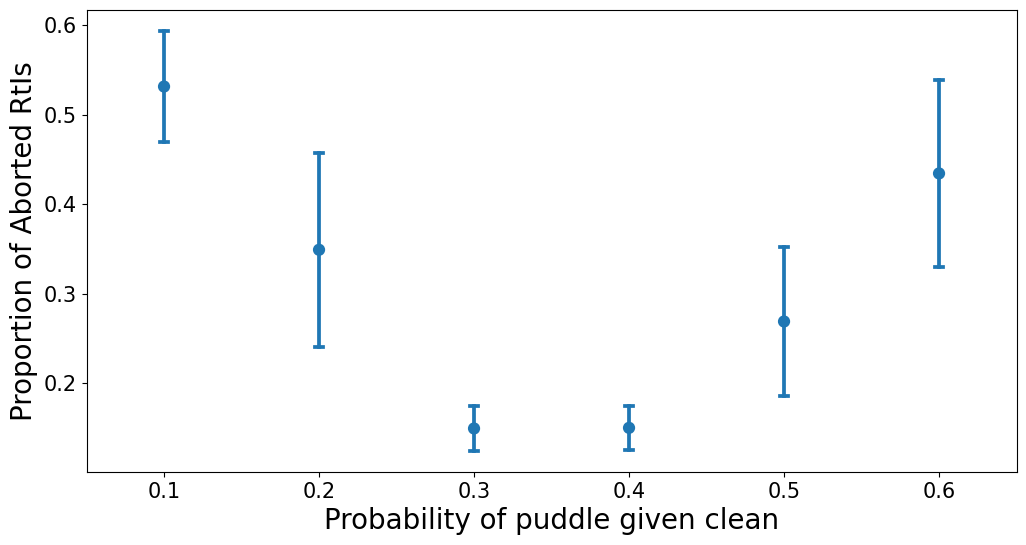

In [3]:
df = pd.read_csv("results/sim3_prop_puddle_100.csv")
path = "figs/sim3/"
#df = df[df.pr_rock.isin([0.1, 0.2, 0.3, 0.4])]

matplotlib.rc_file_defaults()
ax = sns.set_style(style=None, rc=None )

fig, ax = plt.subplots(figsize=(12,6))


#plot_ =  ax = sns.regplot(x="pr_rock", y="prop_manual", data=df)

plot_ = sns.pointplot(x="pr_puddle", y="prop_rejected_RtI", ci="sd", data=df, join=False, capsize=.05)
ax.set_xlabel('Probability of puddle given clean', fontsize=20)
ax.set_ylabel('Proportion of Aborted RtIs', fontsize=20)
ax.tick_params(labelsize=15)



plt.show()

#plot_.figure.savefig("figs/sim_var_params/abort_rti_puddle.png")

# Driver and Environment State plot

In [56]:
def simulate(N):

    sim = simulator(N)
    env = sim.simulate_environment()
    road = env["road"]
    char = env["driver_char"]
    driver = env["driver"]


    driver_state_evol = pd.read_csv("data/driver_state_evol", delim_whitespace=True)
    driver_state_evol.set_index(["Current", "Obstacle"], inplace=True)
    driver_char = pd.read_csv("data/driver_char", index_col=0, delim_whitespace=True)

    ads = ADS(road, char, driver, driver_char, driver_state_evol)
    prob_driver_state = np.zeros(ads.N) + 100

    p_rock_rock = np.zeros(ads.N) + 100
    p_rock_puddle = np.zeros(ads.N) + 100
    p_rock_clean = np.zeros(ads.N) + 100

    p_puddle_rock = np.zeros(ads.N) + 100
    p_puddle_puddle = np.zeros(ads.N) + 100
    p_puddle_clean = np.zeros(ads.N) + 100

    p_clean_rock = np.zeros(ads.N) + 100
    p_clean_puddle = np.zeros(ads.N) + 100
    p_clean_clean = np.zeros(ads.N) + 100


    for i in range(ads.N - 6):

        #if i % 100 == 0:
        #    print(i)

        prob_driver_state[i] = ads.prob_driver_state[1]

        preds = ads.normalize_arr(ads.Dir)
        p_rock_rock[i] = preds[0,0]
        p_rock_puddle[i] = preds[0,1]
        p_rock_clean[i] = preds[0,2]

        p_puddle_rock[i] = preds[1,0]
        p_puddle_puddle[i] = preds[1,1]
        p_puddle_clean[i] = preds[1,2]

        p_clean_rock[i] = preds[2,0]
        p_clean_puddle[i] = preds[2,1]
        p_clean_clean[i] = preds[2,2]

        ads.move()


    df_driver_state = pd.DataFrame({"cell": np.arange(0,N-6), "true_state": driver[0:N-6], "prob": prob_driver_state[0:N-6]} )

    df_env_state = pd.DataFrame({"cell": np.arange(0,N-6), "prr": p_rock_rock[0:N-6],
                                "prp": p_rock_puddle[0:N-6], "prc": p_rock_clean[0:N-6],
                                "ppr": p_puddle_rock[0:N-6], "ppp": p_puddle_puddle[0:N-6],
                                "ppc": p_puddle_clean[0:N-6],"pcr": p_clean_rock[0:N-6],
                               "pcp": p_clean_puddle[0:N-6], "pcc": p_clean_clean[0:N-6]})
    
    return df_env_state, df_driver_state

1
2
3
4


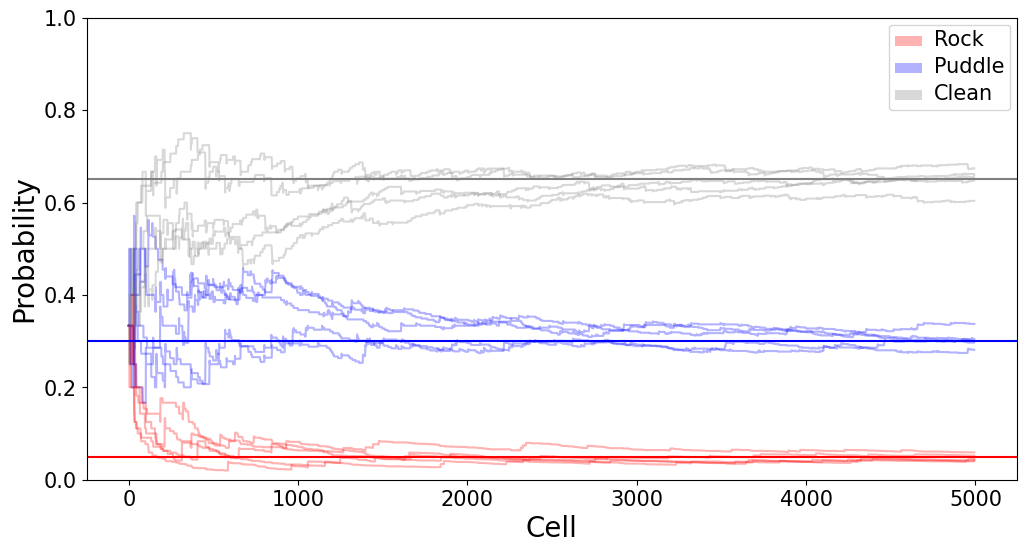

In [62]:
matplotlib.rc_file_defaults()
ax = sns.set_style(style=None, rc=None )

fig, ax = plt.subplots(figsize=(12,6))

df_env_state, _ = simulate(5000)

plot_ = sns.lineplot(df_env_state['cell'], df_env_state['prp'], sort = False, color='r', alpha=0.3)
sns.lineplot(df_env_state['cell'], df_env_state['ppp'], sort = False, color='b', alpha=0.3)
sns.lineplot(df_env_state['cell'], df_env_state['pcp'], sort = False, color='gray', alpha=0.3)

for i in np.arange(1,5):
    print(i)
    
    df_env_state, _ = simulate(5000)

    sns.lineplot(df_env_state['cell'], df_env_state['prp'], sort = False, color='r', alpha=0.3)
    sns.lineplot(df_env_state['cell'], df_env_state['ppp'], sort = False, color='b', alpha=0.3)
    sns.lineplot(df_env_state['cell'], df_env_state['pcp'], sort = False, color='gray', alpha=0.3)

plot_.axhline(0.05, color='r')
plot_.axhline(0.3, color='b')
plot_.axhline(0.65, color='gray')
#ax.xaxis.set_major_locator(plt.MaxNLocator(3))

ax.set_xlabel('Cell', fontsize=20)
ax.set_ylabel('Probability', fontsize=20)
ax.tick_params(labelsize=15)


plt.ylim(0,1.0)

legend_elements = [Patch(facecolor='r', alpha=0.3,
                         label='Rock'), Patch(facecolor='b', alpha=0.3,
                         label='Puddle'), Patch(facecolor='gray', alpha=0.3,
                         label='Clean')]


ax.legend(handles=legend_elements)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text

plt.show()

plot_.figure.savefig("figs/env_state.png")

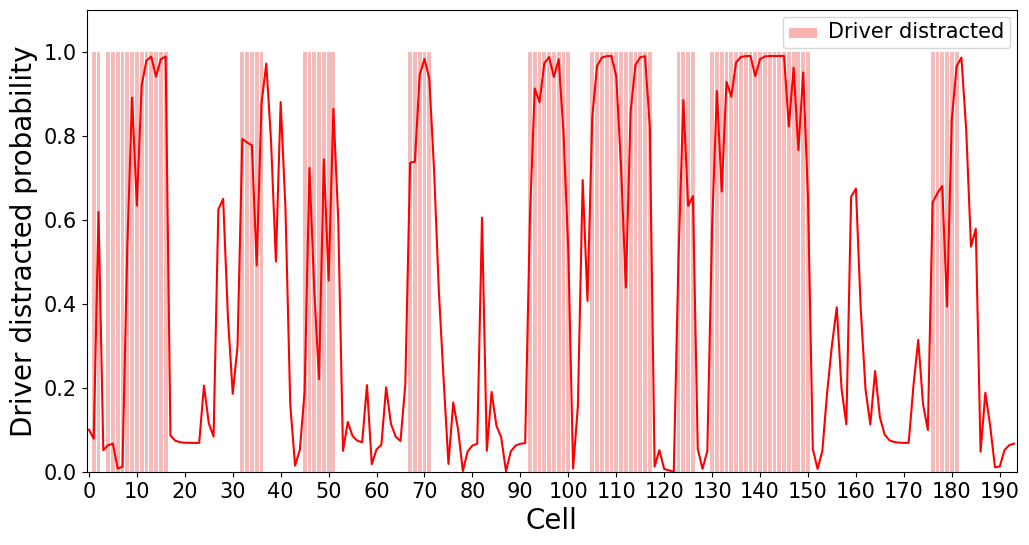

In [53]:
matplotlib.rc_file_defaults()
ax = sns.set_style(style=None, rc=None )

fig, ax = plt.subplots(figsize=(12,6))

_, df_driver_state = simulate(200)

plot_ = sns.lineplot(df_driver_state['cell'], df_driver_state['prob'], sort = False, color='r')
sns.barplot(data = df_driver_state, x='cell', y='true_state', color='r', alpha=0.3)

#ax.xaxis.set_major_locator(plt.MaxNLocator(3))

ax.set_xlabel('Cell', fontsize=20)
ax.set_ylabel('Driver distracted probability', fontsize=20)
ax.tick_params(labelsize=15)

new_ticks = [i.get_text() for i in plot_.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])
plt.ylim(0,1.1)

legend_elements = [Patch(facecolor='r', alpha=0.3,
                         label='Driver distracted')]

ax.legend(handles=legend_elements)

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text


plt.show()

plot_.figure.savefig("figs/driver_state.png")

# Simulation aggregated results - Histograms

In [4]:
def plot_hist(df, x, xlab, path=None):
    
    matplotlib.rc_file_defaults()
    ax = sns.set_style(style=None, rc=None )
    fig, ax = plt.subplots(figsize=(12,6))
    plot_ = sns.distplot(df[x], bins=20, hist_kws={"rwidth":0.95,'edgecolor':'black', 'alpha':0.3},
                        norm_hist=False, kde=False)
    ax.set_xlabel(xlab, fontsize=20)
    ax.set_ylabel('Count', fontsize=20)
    ax.tick_params(labelsize=15)
    '''
    for bar in plot_.patches:
        h = bar.get_height()
        if h != 0:
            plot_.text(bar.get_x() + bar.get_width() / 2,
                      h,
                      f'{h:.0f}\n',
                      ha='center',
                      va='center')
    '''
    if path is not None:
        plot_.figure.savefig(path)

In [5]:
def count_plot(df, x, xlab, path):
    
    matplotlib.rc_file_defaults()
    ax = sns.set_style(style=None, rc=None )
    fig, ax = plt.subplots(figsize=(12,6))
    counts = df[x].value_counts()
    plot_ = sns.barplot(x = counts.index, y = counts, color=sns.color_palette("Paired")[0], 
                edgecolor='black')
    ax.set_xlabel(xlab, fontsize=20)
    ax.set_ylabel('Count', fontsize=20)
    ax.tick_params(labelsize=15)
    
    plot_.figure.savefig(path)

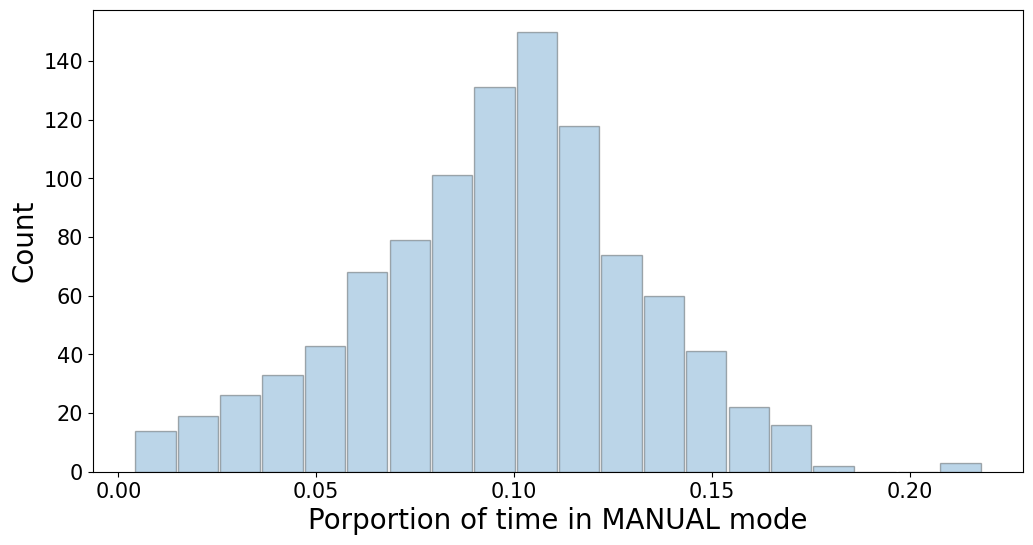

In [74]:
plot_hist(df, 'prop_manual', 'Porportion of time in MANUAL mode', path + 'prop_time_man_less.png')

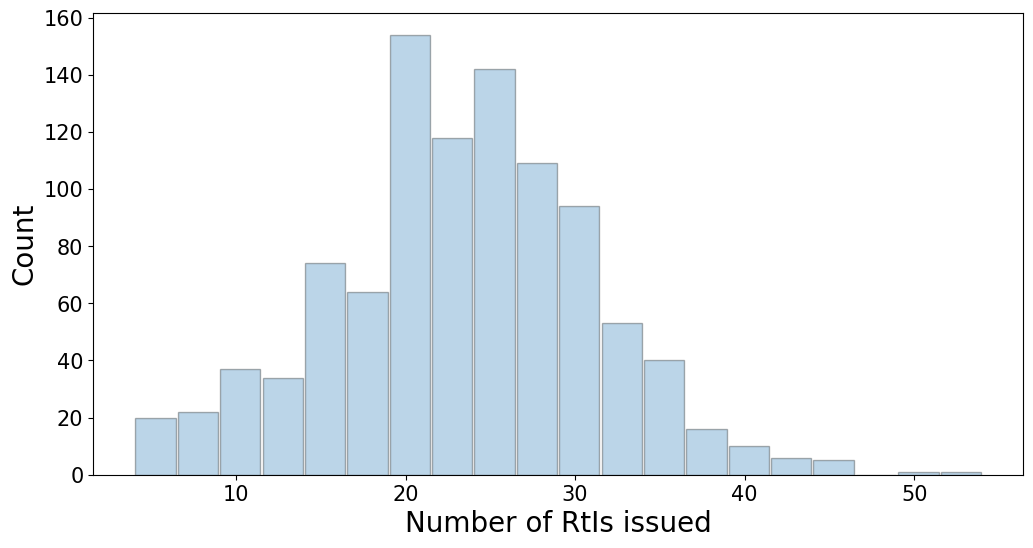

In [75]:
plot_hist(df, 'n_RtI', 'Number of RtIs issued', path + 'n_RtI_less.png')

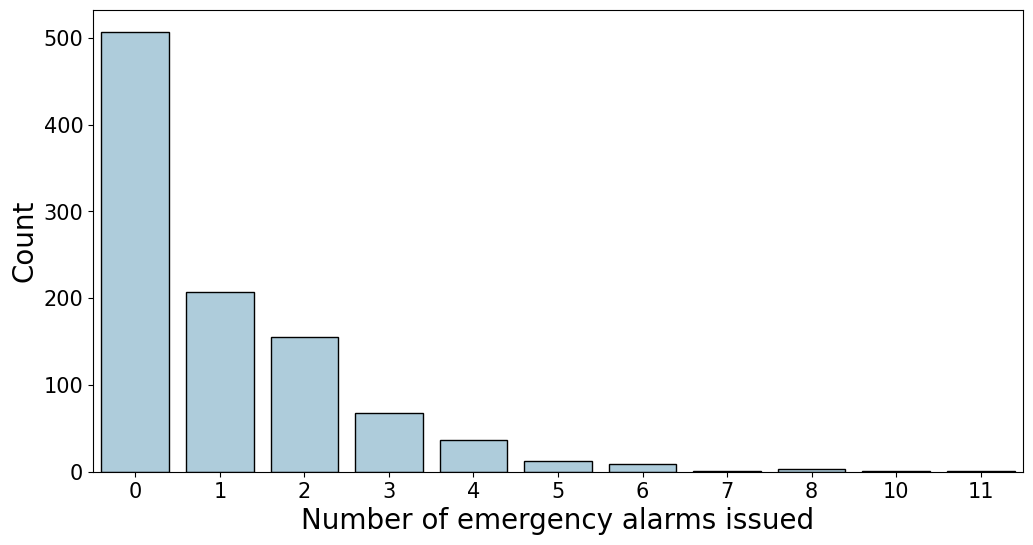

In [76]:
count_plot(df, 'n_emergency', 'Number of emergency alarms issued', path + 'n_emergency_less.png')

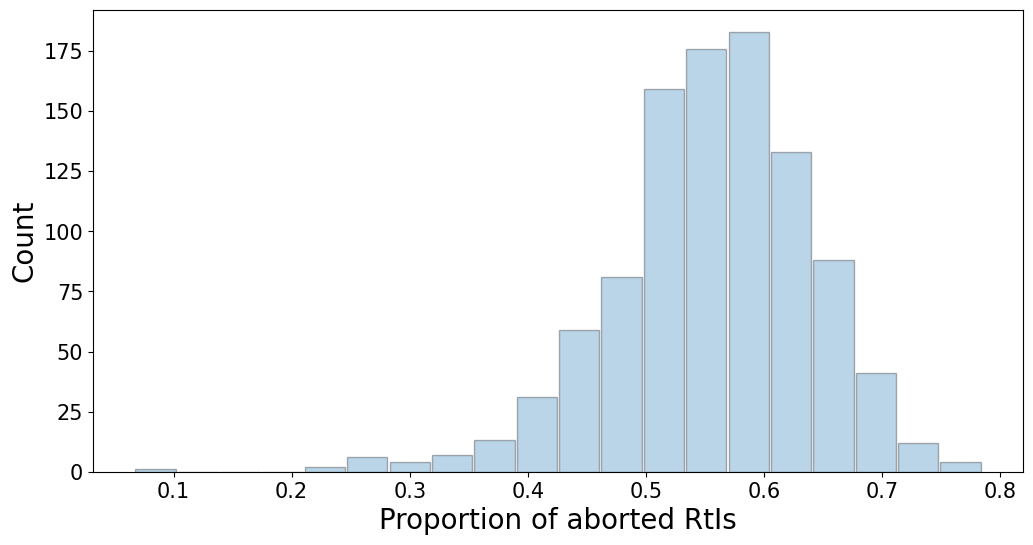

In [10]:
plot_hist(df, 'prop_rejected_RtI', 'Proportion of aborted RtIs', path + 'prop_aborted_RtI_less.png')

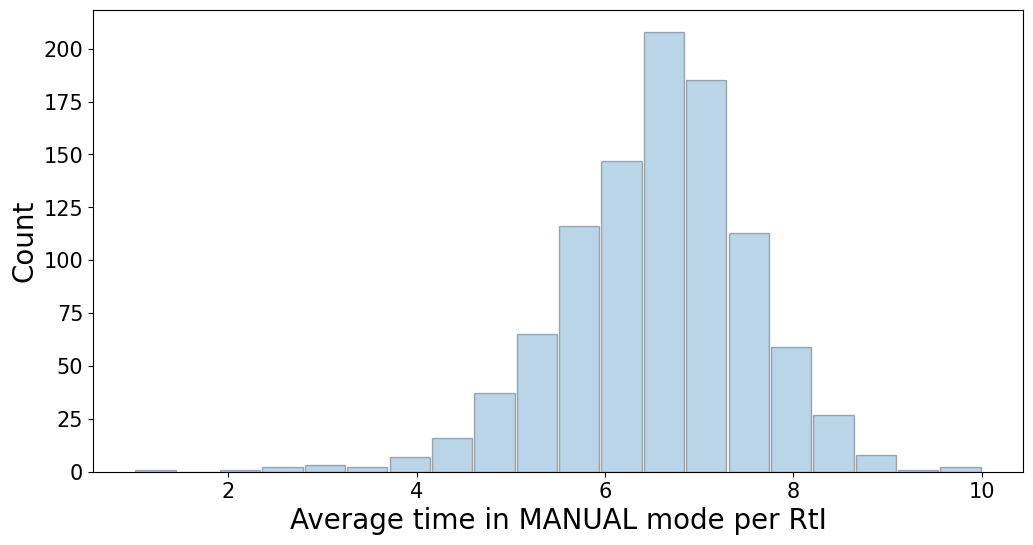

In [78]:
plot_hist(df, 'avg_len_man', 'Average time in MANUAL mode per RtI', path + 'avg_len_man.png')

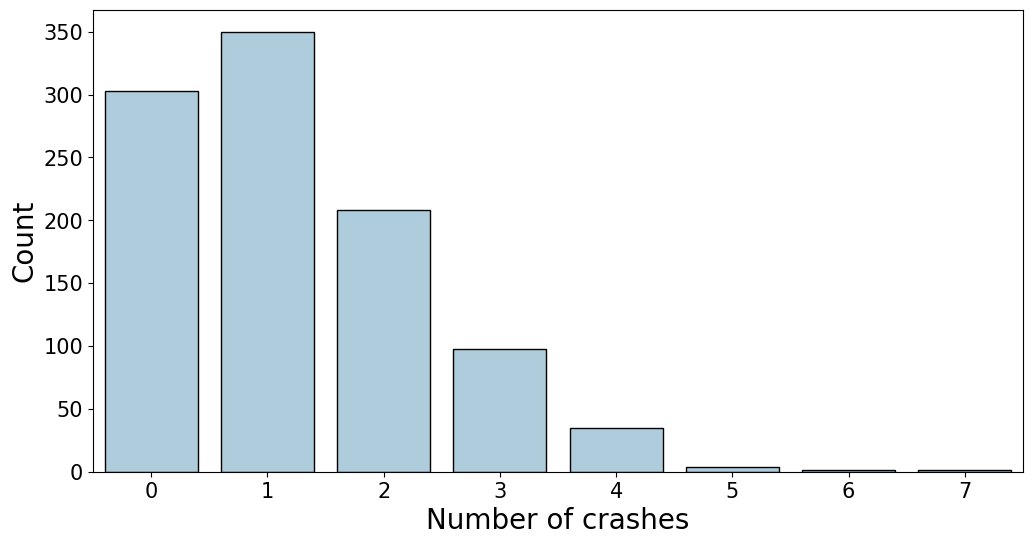

In [79]:
count_plot(df, 'crashes', 'Number of crashes', path + 'crashes.png')

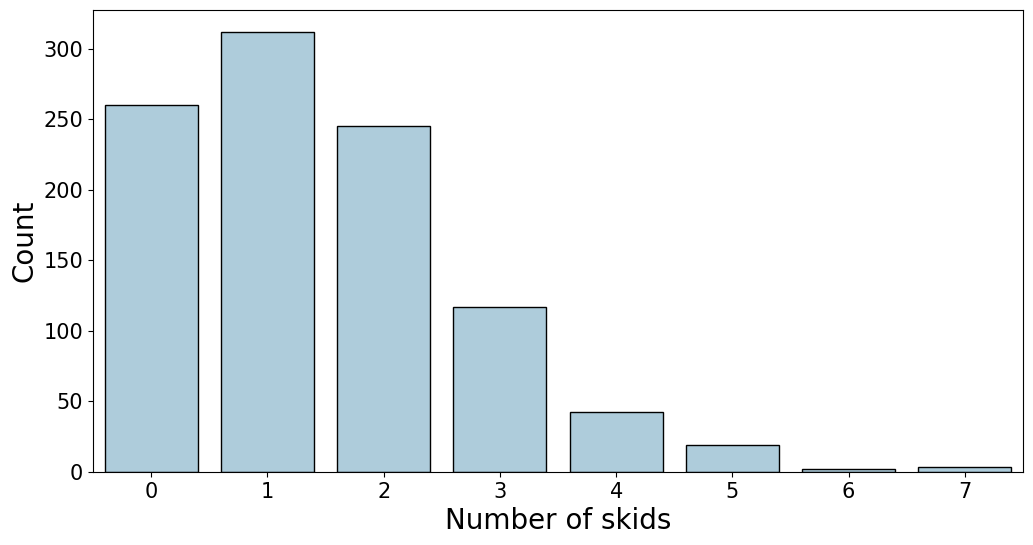

In [80]:
count_plot(df, 'skids', 'Number of skids', path + 'skids.png')

# DIPA

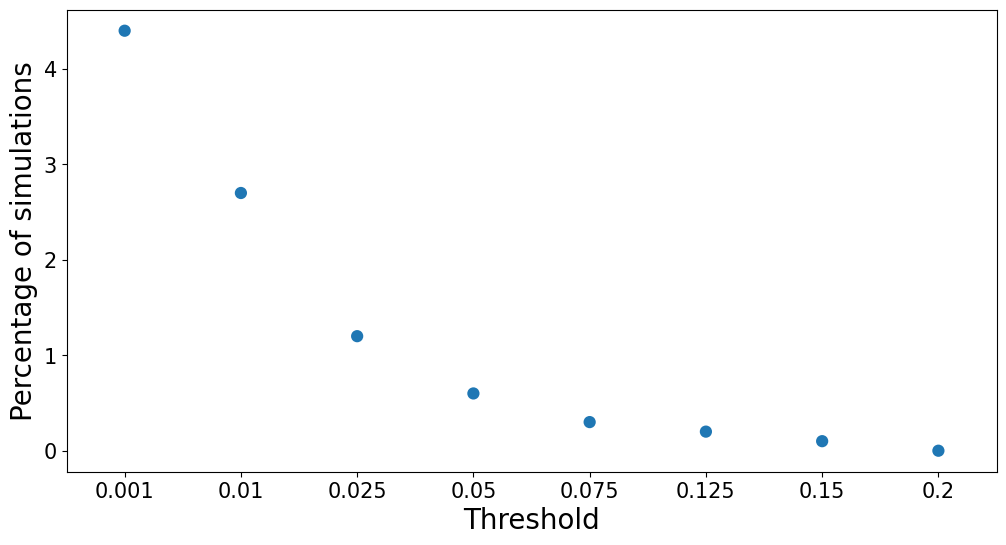

In [64]:
df = pd.read_csv("results/sim_dipa_more_th.csv")
matplotlib.rc_file_defaults()
ax = sns.set_style(style=None, rc=None )
fig, ax = plt.subplots(figsize=(12,6))
x = np.array([0.001, 0.01, 0.025, 0.05, 0.075, 0.125, 0.15, 0.2])
y = np.array( [(df.prob_underp_above_th > th).mean() for th in x] ) * 100
plot_ = sns.pointplot(x=x, y=y, join=False, capsize=.05)
ax.set_xlabel('Threshold', fontsize=20)
ax.set_ylabel('Percentage of simulations', fontsize=20)
ax.tick_params(labelsize=15)
plot_.figure.savefig("figs/dipa.png")


# Simulation aggregated results - Boxplots

In [6]:
def plot_bp(df, y, ylab, path=None):
    
    matplotlib.rc_file_defaults()
    ax = sns.set_style(style=None, rc=None )
    fig, ax = plt.subplots(figsize=(10,10))
    plot_ = sns.boxplot(y=df[y])
    #sns.swarmplot(y=df[y], color=".25")
    ax.set_ylabel(ylab, fontsize=20)
    ax.tick_params(labelsize=15)
    if path is not None:
        plot_.figure.savefig(path)

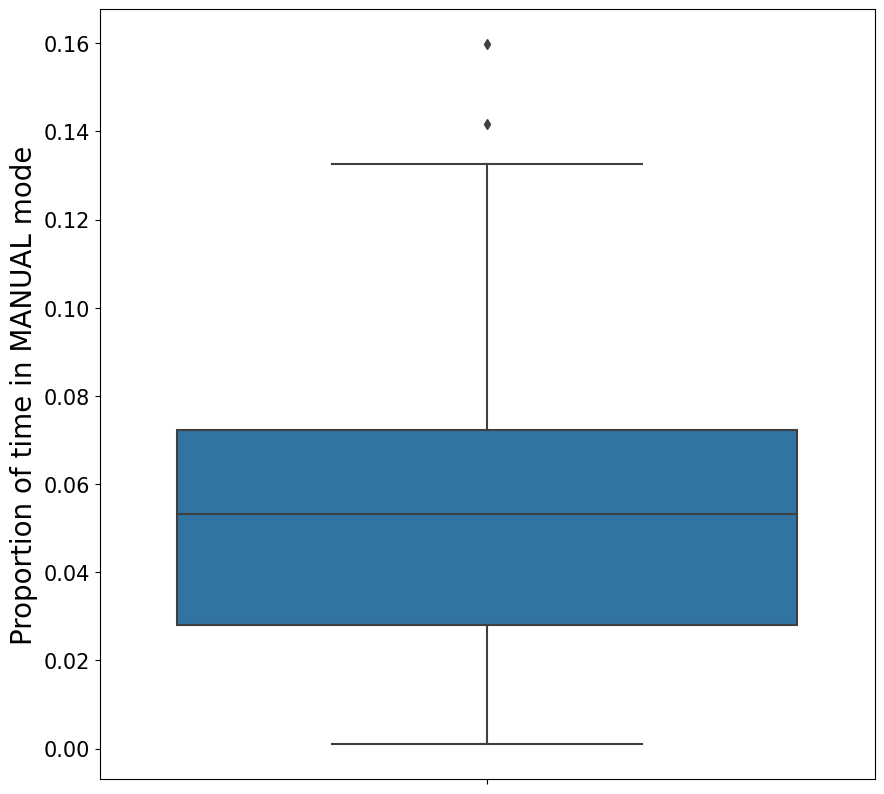

In [69]:
plot_bp(df, 'prop_manual', 'Proportion of time in MANUAL mode', path + 'prop_manual_less.png')

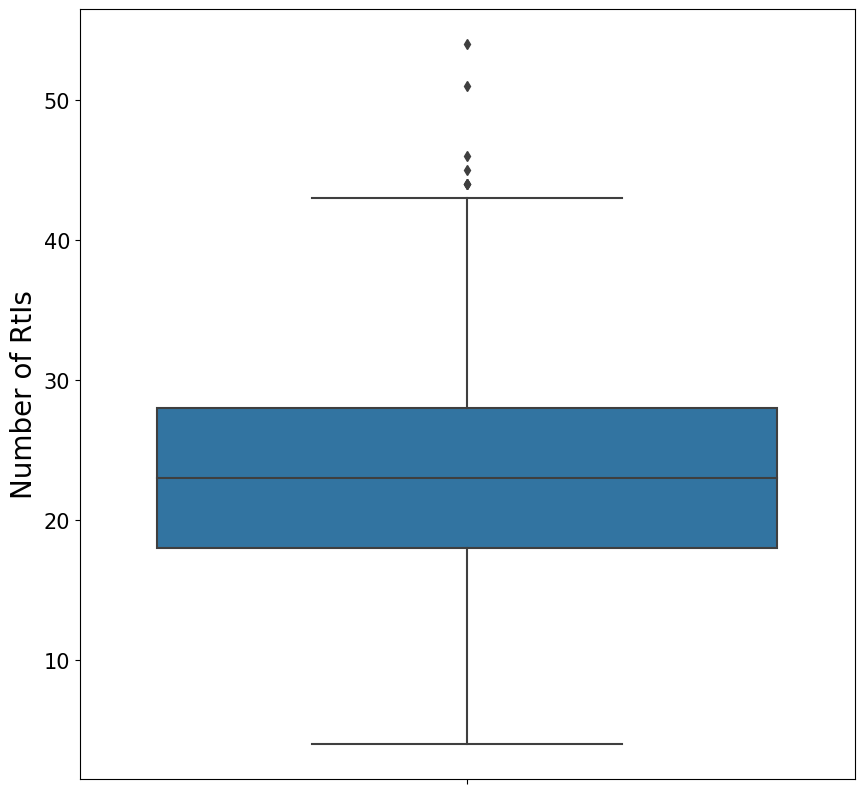

In [54]:
plot_bp(df, 'n_RtI', 'Number of RtIs', path + 'n_RtI.png')

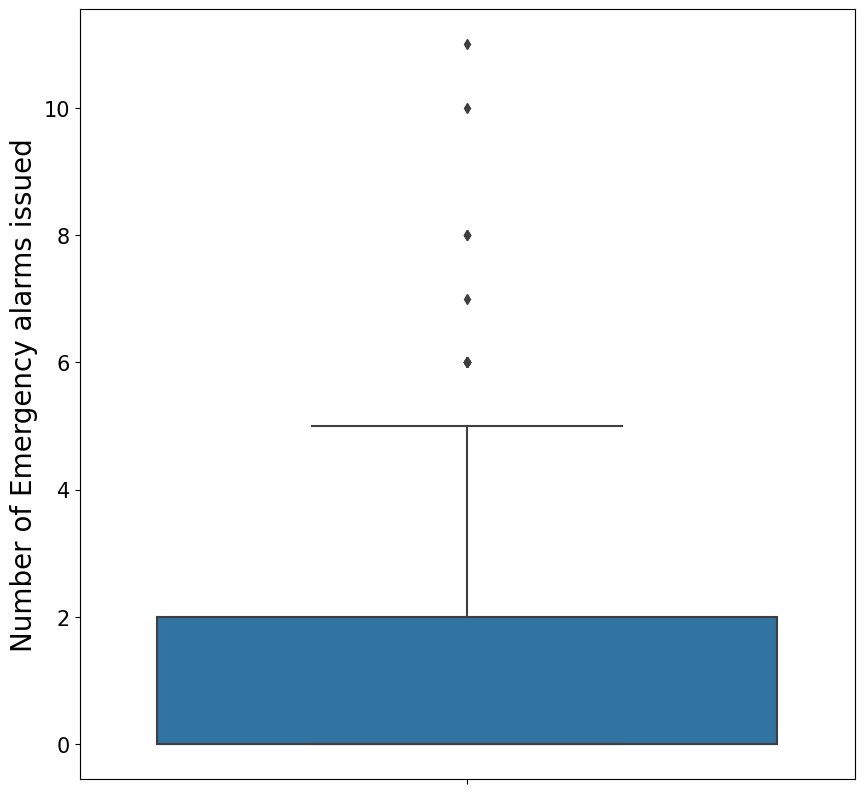

In [55]:
plot_bp(df, 'n_emergency', 'Number of Emergency alarms issued', path + 'n_emergency.png')

# Road plot

In [2]:
def simulate(N):

    sim = simulator(N)
    env = sim.simulate_environment()
    road = env["road"]
    char = env["driver_char"]
    driver = env["driver"]


    driver_state_evol = pd.read_csv("data/driver_state_evol", delim_whitespace=True)
    driver_state_evol.set_index(["Current", "Obstacle"], inplace=True)
    driver_char = pd.read_csv("data/driver_char", index_col=0, delim_whitespace=True)

    ads = ADS(road, char, driver, driver_char, driver_state_evol)


    


    for i in range(ads.N - 6):

        #if i % 100 == 0:
        #    print(i)

        ads.move()


    
    return ads.road, ads.modes, ads.decision_auton, ads.decision_manual, ads.driver

In [3]:
road, modes, dec_auton, dec_manual, driver = simulate(4000)

In [4]:
def plot_road(mat, txt):
    
    cd = [(1, 204/255, 203/255), (209/255, 237/255, 242/255), (1, 1, 1)]
    cm_rgb = LinearSegmentedColormap.from_list("bla",cd)

    def show_values(pc, fmt="%.2f", **kw):
        '''
        Heatmap with text in each cell with matplotlib's pyplot
        Source: http://stackoverflow.com/a/25074150/395857 
        By HYRY
        '''
        pc.update_scalarmappable()
        ax = pc.axes
        ii = 0
        for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.all(color[:3] > 0.5):
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
            ax.text(x, y, txt[ii], ha="center", va="center", color=color, **kw)
            ii+=1

    def cm2inch(*tupl):
        '''
        Specify figure size in centimeter in matplotlib
        Source: http://stackoverflow.com/a/22787457/395857
        By gns-ank
        '''
        inch = 2.54
        if type(tupl[0]) == tuple:
            return tuple(i/inch for i in tupl[0])
        else:
            return tuple(i/inch for i in tupl)

    def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels):
        '''
        Inspired by:
        - http://stackoverflow.com/a/16124677/395857 
        - http://stackoverflow.com/a/25074150/395857
        '''

        # Plot it out
        fig, ax = plt.subplots(figsize=(12,12))
        # ax.axes.get_yaxis().set_visible(False)
        c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cm_rgb, vmin=0.0, vmax=2.0)


        # put the major ticks at the middle of each cell
        ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
        ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

        # set tick labels
        #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
        ax.set_xticklabels(xticklabels, minor=False)
        ax.set_yticklabels(yticklabels, minor=False)

        # set title and x/y labels
        # plt.title(title)

        # Remove last blank column
        plt.xlim( (0, AUC.shape[1]) )


        # Add color bar
        # plt.colorbar(c)

        # Add text in each cell 
        show_values(c)

        # resize 
        fig = plt.gcf()
        fig.set_size_inches(cm2inch(40, 20))
        
        
    x_axis_size = mat.shape[1]
    y_axis_size = mat.shape[0]
    title = "Title"
    xlabel= "xlabel"
    ylabel="ylabel"
    xticklabels = range(1, x_axis_size+1) # could be text
    yticklabels = range(1, y_axis_size+1) # could be text   
    heatmap(mat, title, xlabel, ylabel, xticklabels, yticklabels)
    plt.savefig('figs/road8.png', dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures
    plt.show()


In [28]:
a = -1500
b = a + 90
names = []
txt1 = modes[a:b]
txt1[txt1 == "AUTON"] = "AUTO"
txt_auton = dec_auton[a:b].astype(int)
txt_manual = dec_manual[a:b].astype(int)
txt_driver = driver[a:b].astype(object)
txt_driver[txt_driver == 0] = "Aware"
txt_driver[txt_driver == 1] = "Dist."
for i, lab in enumerate(txt1):
    if lab == "AUTO":
        names.append( txt1[i] + "\n"  + str(txt_auton[i]) )
    else:
        names.append( txt1[i] + "\n" + str( txt_manual[i])  + "\n" + txt_driver[i] )

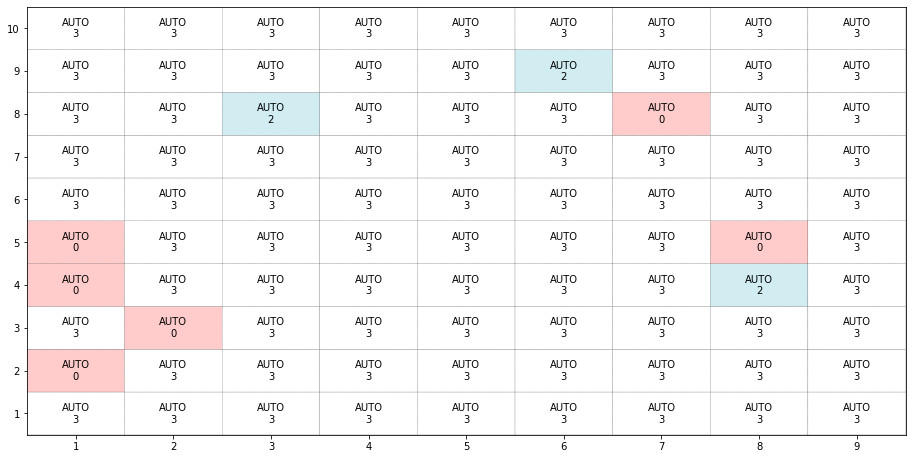

In [29]:
plot_road(road[a:b].reshape(10, 9), names)